# chardet: abbreviation of "Character Encoding Detection", guess how the text file is encoded
with open(data, 'rb') as f:
   - data: file path
   - 'rb': read binary mode. read in bytes, not in text
   - with: safe method to open and close a file automatically
   result = chardet.detect(f.read(100000))
      - read the first 1000000 bytes
      - read too much: slower / read less: less accuracy

# encoding type
1. utf-8: universal encoding for Unicode, support all languages, 1-4 bytes per character, efficient for english
2. utf-16: unicode encoding with fixed-width options, support all languages, 2 or 4 bytes per character, good for Asian scripts, includes BOM(Byte Order Mark)
3. euc-kr: korean-specific legacy encoding, korean only, 1-2 bytes, unsed in older korean systems
4. cp949: microsoft's extension of euc-kr, korean + extra characters, includes more Hangul syllables than euc-kr, common in Windows

-> if non-Korean characters or symbols mixed in, use cp949 rather than euc-kr.

In [1]:
# Check encoding information of big_data_set1_eda.csv
import chardet
data = "C:\\Users\\samsung\\OneDrive\\빅콘테스트 AI데이터 경진대회\\0. Data and Topic Description\\big_data_set1_f.csv"
with open(data, 'rb') as f:
    result = chardet.detect(f.read(100000))  # Read the first 1,000,000 bytes
print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [7]:
# Convert big_data_set1_eda.csv into DataFrame
import pandas as pd

data = "C:\\Users\\samsung\\OneDrive\\빅콘테스트 AI데이터 경진대회\\0. Data and Topic Description\\big_data_set1_f.csv"
big_data_set1_eda = pd.read_csv(data, encoding='cp949')  # Use the detected encoding
big_data_set1_eda.head()

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN


In [42]:
# Columns Information
data_info = "C:\\Users\\samsung\\OneDrive\\빅콘테스트 AI데이터 경진대회\\0. Data and Topic Description\\2025_빅콘테스트_데이터_레이아웃_20250902.xlsx"
big_data_set1_info = pd.read_excel(data_info, sheet_name = "데이터셋1", skiprows=7, nrows=10, usecols="B:G")  # Use the detected encoding
big_data_set1_info

,구분,컬럼명,컬럼한글명,타입,NULL,항목 설명
0,1,ENCODED_MCT,가맹점구분번호,VARCHAR,N,NaN
1,2,MCT_BSE_AR,가맹점주소,VARCHAR,N,상세주소 제외
2,3,MCT_NM,가맹점명,VARCHAR,N,"앞2자리이후 마스킹처리(가맹점명이 2자리인경우 : 앞1자리 제외 마스킹, 가맹점명이..."
3,4,MCT_BRD_NUM,브랜드구분코드,VARCHAR,Y,동일 브랜드 매장 식별을 위한 구분코드
4,5,MCT_SIGUNGU_NM,가맹점지역,VARCHAR,N,NaN
5,6,HPSN_MCT_ZCD_NM,업종,VARCHAR,N,NaN
6,7,HPSN_MCT_BZN_CD_NM,상권,VARCHAR,Y,NaN
7,8,ARE_D,개설일,VARCHAR,N,NaN
8,9,MCT_ME_D,폐업일,VARCHAR,Y,NaN


In [45]:
# Change the name of columns
columns_names = big_data_set1_info['컬럼한글명']
print(columns_names)
big_data_set1_eda.columns = columns_names
big_data_set1_eda.head()

0    가맹점구분번호
1      가맹점주소
2       가맹점명
3    브랜드구분코드
4      가맹점지역
5         업종
6         상권
7        개설일
8        폐업일
Name: 컬럼한글명, dtype: object


컬럼한글명,가맹점구분번호,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN


In [24]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   --------------------

AttributeError: Rectangle.set() got an unexpected keyword argument 'encoding'

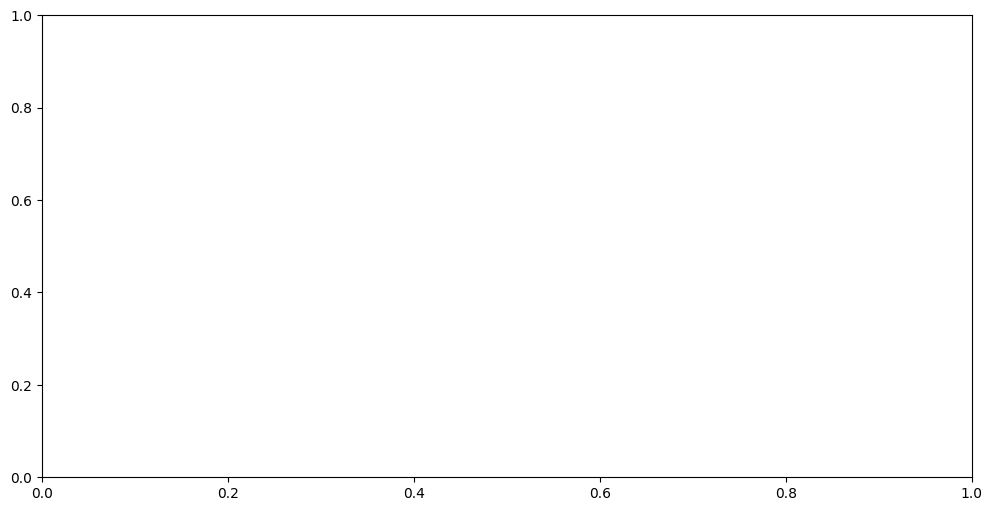

In [49]:
# 업종별 가맹점 수 분포
big_data_set1_eda['업종'].value_counts().plot(kind='bar', figsize=(12, 6), title='업종별 가맹점 수 분포', encoding = 'utf-8')

In [47]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.2 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.8 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.5 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.7 MB/s eta 0:00:01
   ------------------------

In [11]:
import sys
print(sys.executable)

C:\Users\samsung\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
